In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import uproot as root
import numpy as np

In [42]:
data7000Gev=pd.read_csv('DatosArticulo/Datos7000GeV.csv', comment='#')
data900Gev=pd.read_csv('DatosArticulo/Datos900GeV.csv', comment='#')
X1=data900Gev['MULT(P=3)']
Y1=data900Gev['PROBABILITY/UNIT BIN WIDTH']
X2=data7000Gev['MULT(P=3)']
Y2=data7000Gev['PROBABILITY/UNIT BIN WIDTH']*100
error900y=data900Gev['stat +']+data900Gev['sys +']
error7000y=data7000Gev['stat +']+data7000Gev['sys +']

In [44]:
def RE(X,Y,x,y,n):
    i=0+n
    RE=[]
    MUl=[]
    while i<len(x)+n:
        if y[i]==0:
            i+=1
        else:
            MUl.append(x[i])
            a=abs(X-x[i])
            b=a.idxmin()
            c=abs(y[i])/Y[b]
            RE.append(c)
            i+=1
    return RE, MUl

In [45]:
data7000Gev

,MULT(P=3),MULT(P=3) LOW,MULT(P=3) HIGH,PROBABILITY/UNIT BIN WIDTH,stat +,stat -,sys +,sys -
0,1.0,0.5,1.5,0.062011,0.001240,-0.001240,0.001972,-0.001972
1,2.0,1.5,2.5,0.072943,0.001459,-0.001459,0.001972,-0.001972
2,3.0,2.5,3.5,0.070771,0.001415,-0.001415,0.001050,-0.001050
3,4.0,3.5,4.5,0.067245,0.001345,-0.001345,0.000914,-0.000914
4,5.0,4.5,5.5,0.062834,0.001257,-0.001257,0.000770,-0.000770
...,...,...,...,...,...,...,...,...
60,61.5,60.5,62.5,0.000296,0.000032,-0.000032,0.000035,-0.000035
61,63.5,62.5,64.5,0.000265,0.000032,-0.000032,0.000035,-0.000035
62,65.5,64.5,66.5,0.000193,0.000030,-0.000030,0.000028,-0.000028
63,67.5,66.5,68.5,0.000160,0.000026,-0.000026,0.000025,-0.000025


In [46]:
data900Gev['MULT(P=3)'][0:20]

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
Name: MULT(P=3), dtype: float64

# Parameterized fluid expansion (mimic hydro)

### Histograma con 1000 datos random

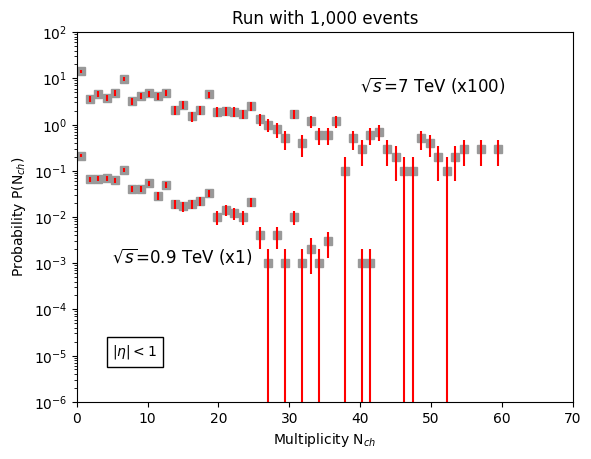

In [47]:
df2=pd.read_csv('PP/PFE/7000GeV/Run1_10-3/10_3pp7000GeV.txt',sep=' ', header=None)
x2=df2[2][0:50]
y2=df2[4][0:50]*100
error2=df2[6][0:50]*100

df3=pd.read_csv('PP/PFE/900GeV/Run1_10-3/10_3pp900GeV.txt',sep=' ', header=None)
x3=df3[2][0:50]
y3=df3[4][0:50]
error3=df3[6][0:50]


fig, ax = plt.subplots()

ax.plot(x3, y3, 's', color='#999999')
ax.plot(x2, y2, 's', color='#999999')
ax.errorbar(x2, y2, yerr=error2, fmt='None', color='r')
ax.errorbar(x3, y3, yerr=error3, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,70])
ax.set_ylim([10**-6, 100])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.yscale('log')
plt.title('Run with 1,000 events')
plt.savefig('Multiplicidad 1000 eventos random (pp mimic).png')
plt.show()

### Histograma con 10,000 datos random

In [48]:
datos=pd.read_csv('PP/PFE/7000GeV/Run1_10-4/10_4pp7000GeV.txt',sep=' ', header=None)
x5=datos[2][0:50]
y5=datos[4][0:50]*100
error5=datos[6][0:50]*100

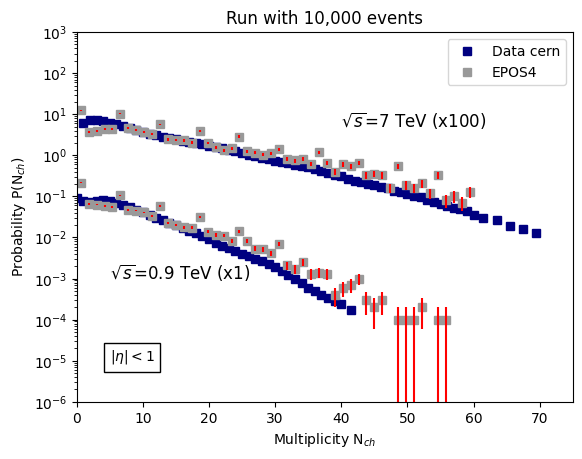

In [49]:
df4=pd.read_csv('PP/PFE/900GeV/Run1_10-4/10_4pp900GeV.txt',sep=' ', header=None)
x4=df4[2][0:50]
y4=df4[4][0:50]
error4=df4[6][0:50]

fig, ax = plt.subplots()

#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x4, y4, 's', color='#999999', label='EPOS4')
ax.plot(x5, y5, 's', color='#999999')
ax.errorbar(x5, y5, yerr=error5, linestyle='None', color='r')
ax.errorbar(x4, y4, yerr=error4, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 10,000 events')
plt.savefig('Multiplicidad 10000 eventos random (pp mimic).png')
plt.show()

# Collision without hydro and hadronic cascade

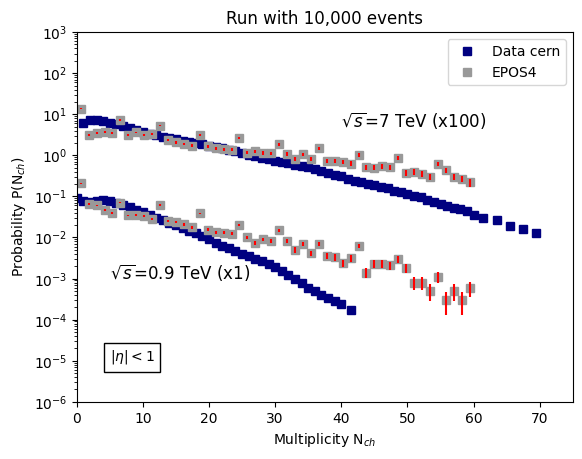

In [50]:
df6=pd.read_csv('PP/No_hydro/7000 GeV/10_4pp_noH7000GeV.txt',sep=' ', header=None)
x6=df6[2][0:50]
y6=df6[4][0:50]*100
error6=df6[6][0:50]*100

df7=pd.read_csv('PP/No_hydro/900GeV/10_4pp_noH900GeV.txt',sep=' ', header=None)
x7=df7[2][0:50]
y7=df7[4][0:50]
error7=df7[6][0:50]


fig, ax = plt.subplots()
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4

ax.plot(x6, y6, 's', color='#999999', label='EPOS4')
ax.plot(x7, y7, 's', color='#999999')
ax.errorbar(x6, y6, yerr=error6, fmt='None', color='r')
ax.errorbar(x7, y7, yerr=error7, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 10,000 events')
plt.savefig('Multiplicidad 10000 eventos random (no hydro).png')
plt.show()

# hydro and hadronic cascade 

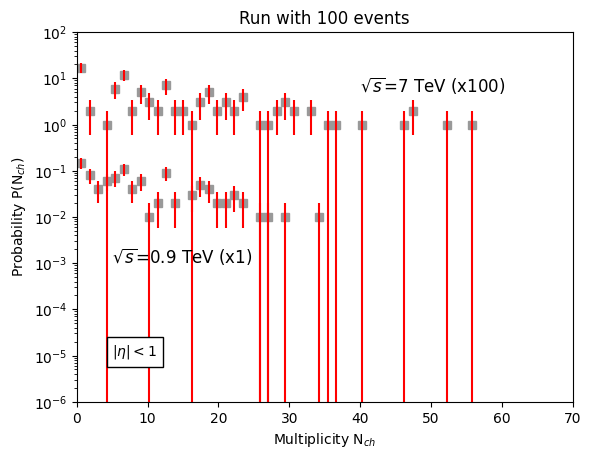

In [51]:
df8=pd.read_csv('PP/Hydro/7000GeV/Run1_100/10_2pp7000GeV.txt',sep=' ', header=None)
x8=df8[2][0:50]
y8=df8[4][0:50]*100
error8=df8[6][0:50]*100

df9=pd.read_csv('PP/Hydro/900GeV/Run1_100/10_2pp900GeV.txt',sep=' ', header=None)
x9=df9[2][0:50]
y9=df9[4][0:50]
error9=df9[6][0:50]


fig, ax = plt.subplots()

ax.plot(x8, y8, 's', color='#999999')
ax.plot(x9, y9, 's', color='#999999')
ax.errorbar(x8, y8, yerr=error8, fmt='None', color='r')
ax.errorbar(x9, y9, yerr=error9, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,70])
ax.set_ylim([10**-6, 100])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.yscale('log')
plt.title('Run with 100 events')
plt.savefig('Multiplicidad 100 eventos random (hydro).png')
plt.show()

## Datos con restriccion de pt

In [52]:
df11=pd.read_csv('900GeV/Run1_210-4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][0:60]
y11=df11[4][0:60]
error11=df11[6][0:60]
print(x11)

0      0.5833
1      1.7500
2      2.9170
3      4.0830
4      5.2500
5      6.4170
6      7.5830
7      8.7500
8      9.9170
9     11.0800
10    12.2500
11    13.4200
12    14.5800
13    15.7500
14    16.9200
15    18.0800
16    19.2500
17    20.4200
18    21.5800
19    22.7500
20    23.9200
21    25.0800
22    26.2500
23    27.4200
24    28.5800
25    29.7500
26    30.9200
27    32.0800
28    33.2500
29    34.4200
30    35.5800
31    36.7500
32    37.9200
33    39.0800
34    40.2500
35    41.4200
36    42.5800
37    43.7500
38    44.9200
39    46.0800
40    47.2500
41    48.4200
42    49.5800
43    50.7500
44    51.9200
45    53.0800
46    54.2500
47    55.4200
48    56.5800
49    57.7500
50    58.9200
51    60.0800
52    61.2500
53    62.4200
54    63.5800
55    64.7500
56    65.9200
57    67.0800
58    68.2500
59    69.4200
Name: 2, dtype: float64


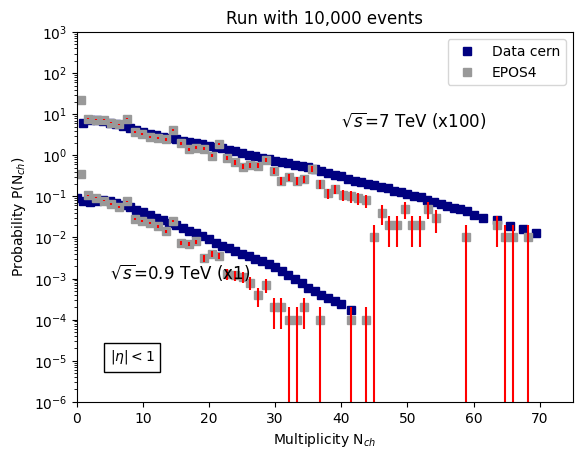

In [53]:
#MULTIPLICIDAD PARTICULAS seleccionadas

df10=pd.read_csv('7000GeV/Run2/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][0:60]
y10=df10[4][0:60]*100
error10=df10[6][0:60]*100

df11=pd.read_csv('900GeV/Run3/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][0:60]
y11=df11[4][0:60]
error11=df11[6][0:60]


fig, ax = plt.subplots()
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 10,000 events')
plt.savefig('Multiplicidad 10000 eventos particulas seleccionadas (PFE).png')
plt.show()

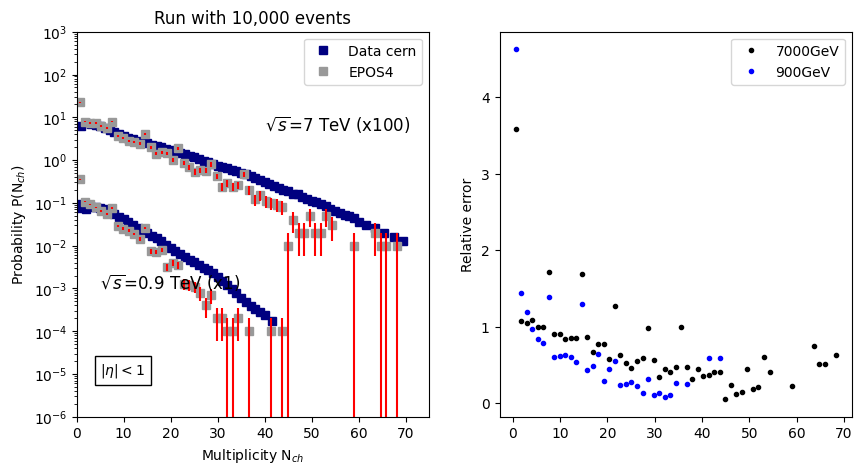

In [54]:
#MULTIPLICIDAD PARTICULAS cargadas

#6:30 am modifique los datos para ponerlos con el mulevt
df10=pd.read_csv('7000GeV/Run2/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][60:120]
y10=df10[4][60:120]*100
error10=df10[6][60:120]*100

df11=pd.read_csv('900GeV/Run3/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][60:120]
y11=df11[4][60:120]
error11=df11[6][60:120]

RE1=RE(X1,Y1,x11,y11,60) #error relativo 900GeV
RE2=RE(X2,Y2,x10,y10,60) #error relativo 7000GeV

fig, (ax,ax2) = plt.subplots(1,2 , figsize=(10, 5))

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
ax.legend()
ax.set_yscale('log')
ax.set_title('Run with 10,000 events')


#Grafica 2

ax2.plot(RE2[1],RE2[0], '.k', label='7000GeV')
ax2.plot(RE1[1],RE1[0], '.b', label='900GeV')
ax2.set_ylabel('Relative error')
ax2.legend()


plt.savefig('Multiplicidad 10000 eventos random (PFE).png')
plt.show()

In [55]:
print(RE1[0])

[4.623654500768857, 1.4460693949449017, 1.1884441953481262, 0.9692773691042839, 0.8419386643142546, 0.789345970481601, 1.3942722780461818, 0.6102341349719249, 0.6125237932549172, 0.6336275175379045, 0.6102362204724409, 0.5429829890643986, 1.2978453738910014, 0.4334836857829067, 0.4838489845986098, 0.6395395315372931, 0.2926460870386104, 0.4476776720761052, 0.5502279515799402, 0.24002954209748892, 0.2572347266881029, 0.27220984904726553, 0.22733731173628874, 0.13071895424836602, 0.3133393017009848, 0.10775862068965518, 0.13227513227513227, 0.08244023083264633, 0.10395010395010396, 0.2628120893561104, 0.2544529262086514, 0.5882352941176471, 0.5882352941176471]


In [56]:
df11=pd.read_csv('7000GeV/Run2/10_4pp7000GeV.txt',sep=' ', header=None)
x11=df11[4][120:149]
print(x11)

120    0.0057
121    0.0130
122    0.0205
123    0.0305
124    0.0398
125    0.0492
126    0.0563
127    0.0669
128    0.0713
129    0.0768
130    0.0763
131    0.0744
132    0.0650
133    0.0612
134    0.0471
135    0.0461
136    0.0412
137    0.0345
138    0.0313
139    0.0254
140    0.0218
141    0.0148
142    0.0109
143    0.0070
144    0.0060
145    0.0034
146    0.0025
147    0.0010
148    0.0001
Name: 4, dtype: float64


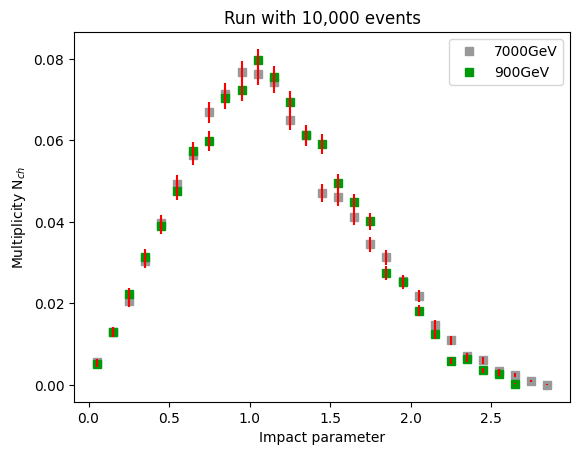

In [57]:
#distribuccion del parametro de impacto
df10=pd.read_csv('7000GeV/Run2/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][120:149]
y10=df10[4][120:149]
error10=df10[6][120:149]

df11=pd.read_csv('900GeV/Run1_210-4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][120:147]
y11=df11[4][120:147]
error11=df11[6][120:147]


fig, ax = plt.subplots()

ax.plot(x10, y10, 's', color='#999999', label='7000GeV')
ax.plot(x11, y11, 's', color='#009909', label='900GeV')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Impact parameter')
ax.set_ylabel(r'Multiplicity N$_{ch}$')
plt.legend()
plt.title('Run with 10,000 events')
plt.savefig('Distribucion del parametro de impacto 10000 (PFE).png')
plt.show()

## 20,000 datos

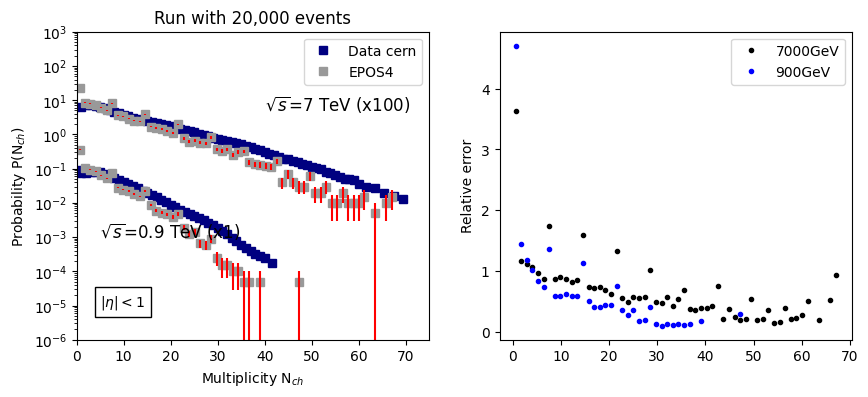

In [58]:
#MULTIPLICIDAD PARTICULAS seleccionadas

df10=pd.read_csv('7000GeV/Run4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][0:60]
y10=df10[4][0:60]*100
error10=df10[6][0:60]*100

df11 = pd.read_csv('900GeV/Run4/10_4pp900GeV.txt',sep=' ', header=None)
x11 = df11[2][0:60]
y11 = df11[4][0:60]
error11 = df11[6][0:60]

RE1=RE(X1, Y1, x11, y11, 0) #error relativo 900GeV
RE2=RE(X2, Y2, x10, y10, 0) #error relativo 7000GeV

fig, (ax,ax2) = plt.subplots(1,2 , figsize=(10, 4))
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
ax.legend()
ax.set_yscale('log')
ax.set_title('Run with 20,000 events')



#Grafica 2

ax2.plot(RE2[1],RE2[0], '.k', label='7000GeV')
ax2.plot(RE1[1],RE1[0], '.b', label='900GeV')
ax2.set_ylabel('Relative error')
ax2.legend()

plt.savefig('Multiplicidad 20000 eventos particulas seleccionadas (PFE).png')
plt.show()


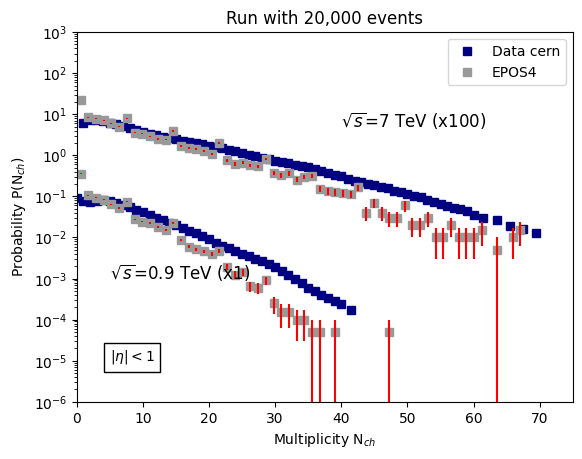

In [59]:
#MULTIPLICIDAD PARTICULAS cargadas

#6:30 am modifique los datos para ponerlos con el mulevt
df10=pd.read_csv('7000GeV/Run4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][60:120]
y10=df10[4][60:120]*100
error10=df10[6][60:120]*100

df11=pd.read_csv('900GeV/Run4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][60:120]
y11=df11[4][60:120]
error11=df11[6][60:120]


fig, ax = plt.subplots()
ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 20,000 events')
plt.savefig('Multiplicidad 20000 eventos random (PFE).png')
plt.show()

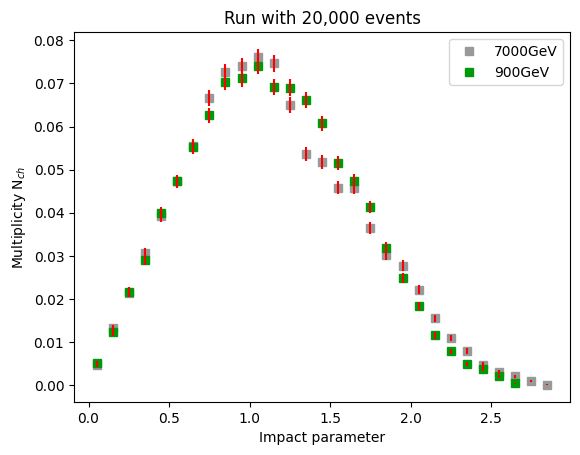

In [60]:
#distribuccion del parametro de impacto
df10=pd.read_csv('7000GeV/Run4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][120:149]
y10=df10[4][120:149]
error10=df10[6][120:149]

df11=pd.read_csv('900GeV/Run4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][120:147]
y11=df11[4][120:147]
error11=df11[6][120:147]


fig, ax = plt.subplots()

ax.plot(x10, y10, 's', color='#999999', label='7000GeV')
ax.plot(x11, y11, 's', color='#009909', label='900GeV')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Impact parameter')
ax.set_ylabel(r'Multiplicity N$_{ch}$')
plt.legend()
plt.title('Run with 20,000 events')
plt.savefig('Distribucion del parametro de impacto 20000 (PFE).png')
plt.show()

## Para el codigo mu14

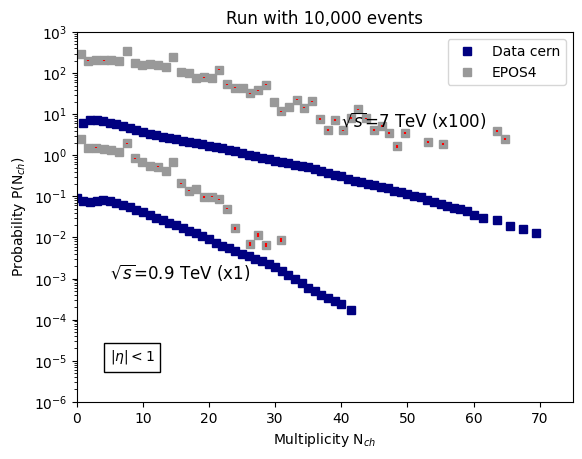

In [61]:
#MULTIPLICIDAD PARTICULAS seleccionadas



df10=pd.read_csv('7000GeV/Run1_210-4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][0:60]
y10=df10[4][0:60]*100
error10=df10[6][0:60]*100

df11=pd.read_csv('900GeV/Run1_210-4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][0:60]
y11=df11[4][0:60]
error11=df11[6][0:60]


fig, ax = plt.subplots()
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 10,000 events')
plt.savefig('Multiplicidad (mu14) 10000 eventos particulas seleccionadas (PFE).png')
plt.show()

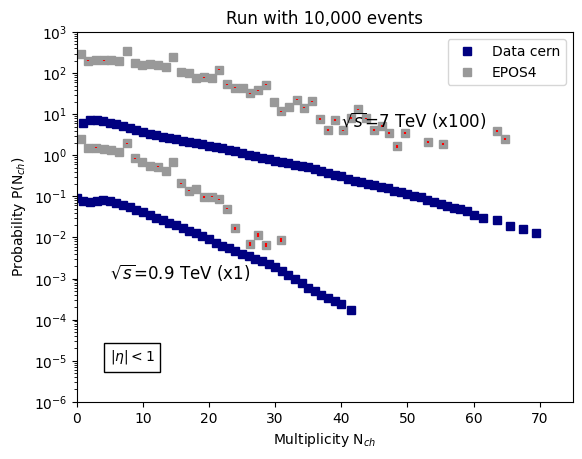

In [62]:
#MULTIPLICIDAD PARTICULAS cargadas

#6:30 am modifique los datos para ponerlos con el mulevt
df10=pd.read_csv('7000GeV/Run1_210-4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][60:120]
y10=df10[4][60:120]*100
error10=df10[6][60:120]*100

df11=pd.read_csv('900GeV/Run1_210-4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][60:120]
y11=df11[4][60:120]
error11=df11[6][60:120]


fig, ax = plt.subplots()
ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

ax.plot(x10, y10, 's', color='#999999', label='EPOS4')
ax.plot(x11, y11, 's', color='#999999')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
plt.legend()
plt.yscale('log')
plt.title('Run with 10,000 events')
plt.savefig('Multiplicidad (mu14) 10000 eventos random (PFE).png')
plt.show()

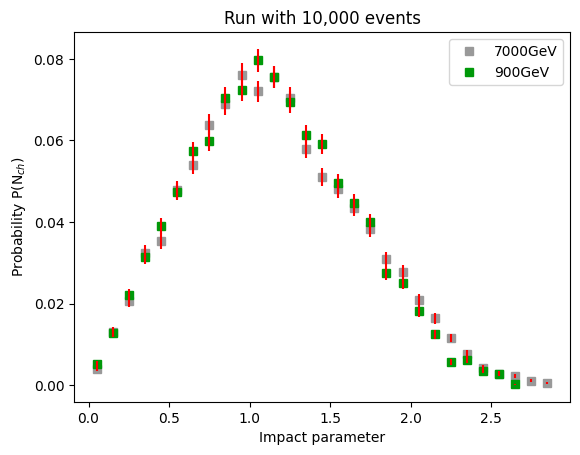

In [63]:
#MULTIPLICIDAD PARTICULAS seleccionadas
df10=pd.read_csv('7000GeV/Run1_210-4/10_4pp7000GeV.txt',sep=' ', header=None)
x10=df10[2][120:149]
y10=df10[4][120:149]
error10=df10[6][120:149]

df11=pd.read_csv('900GeV/Run1_210-4/10_4pp900GeV.txt',sep=' ', header=None)
x11=df11[2][120:147]
y11=df11[4][120:147]
error11=df11[6][120:147]


fig, ax = plt.subplots()

ax.plot(x10, y10, 's', color='#999999', label='7000GeV')
ax.plot(x11, y11, 's', color='#009909', label='900GeV')
ax.errorbar(x10, y10, yerr=error10, fmt='None', color='r')
ax.errorbar(x11, y11, yerr=error11, linestyle='None', color='r')
ax.set_xlabel(r'Impact parameter')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
plt.legend()
plt.title('Run with 10,000 events')
plt.savefig('Distribucion del parametro de impacto 10000 (PFE,mu14).png')
plt.show()

## Como abrir archivos .root

In [64]:
file=root.open('7000GeV/Run5/z-pp7000_1.root')

In [65]:
file.keys()

['teposevent0;8',
 'teposevent0;7',
 'teposhead0;1',
 'teposhead;1',
 'teposevent;1']

In [66]:
file.classnames()

{'teposevent0;8': 'TTree',
 'teposevent0;7': 'TTree',
 'teposhead0;1': 'TTree',
 'teposhead;1': 'TTree',
 'teposevent;1': 'TTree'}

# Nuevos datos

In [67]:
#data1=pd.read_csv('7000GeV/Run5/Run5_1.txt', sep=' ', header=None)
#data2=pd.read_csv('7000GeV/Run5/Run5_2.txt', sep=' ', header=None)

## core full

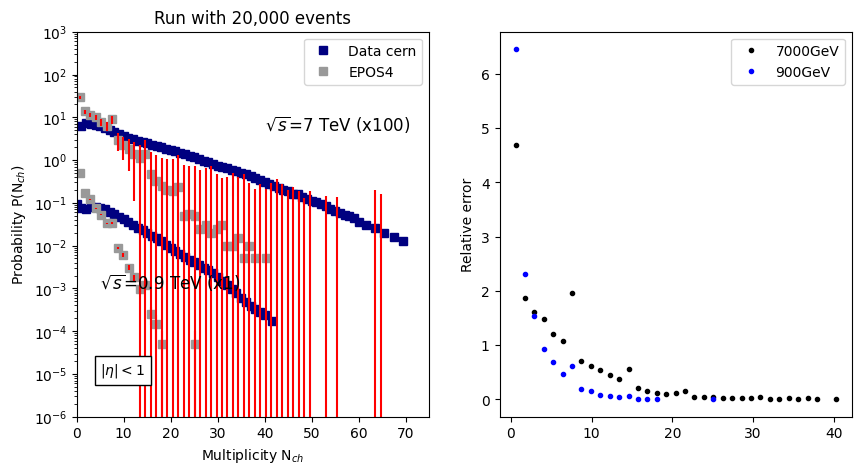

In [68]:
#MULTIPLICIDAD PARTICULAS seleccionadas

df=pd.read_csv('7000GeV/Run5/pp7000_1.txt',sep=' ', header=None, comment='#')
x=df[2][0:60]
y=df[4][0:60]*100
error=df10[6][0:60]*100

df1 = pd.read_csv('900GeV/Run5/pp900_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][0:60]
y1 = df1[4][0:60]
error1 = df1[6][0:60]

RE1=RE(X1, Y1, x1, y1, 0) #error relativo 900GeV
RE2=RE(X2, Y2, x, y, 0) #error relativo 7000GeV

fig, (ax,ax2) = plt.subplots(1,2 , figsize=(10, 5))
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x, y, 's', color='#999999', label='EPOS4')
ax.plot(x1, y1, 's', color='#999999')
ax.errorbar(x, y, yerr=error, fmt='None', color='r')
ax.errorbar(x1, y1, yerr=error1, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicity N$_{ch}$')
ax.set_ylabel(r'Probability P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(40,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(5,1*10**(-3) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(5, 10**-5, r'$|\eta|<1$', bbox=dict(facecolor='white'))
ax.legend()
ax.set_yscale('log')
ax.set_title('Run with 20,000 events')



#Grafica 2

ax2.plot(RE2[1],RE2[0], '.k', label='7000GeV')
ax2.plot(RE1[1],RE1[0], '.b', label='900GeV')
ax2.set_ylabel('Relative error')
ax2.legend()

plt.savefig('Multiplicidad 20000 eventos particulas seleccionadas (core:full, no hydro).png')
plt.show()

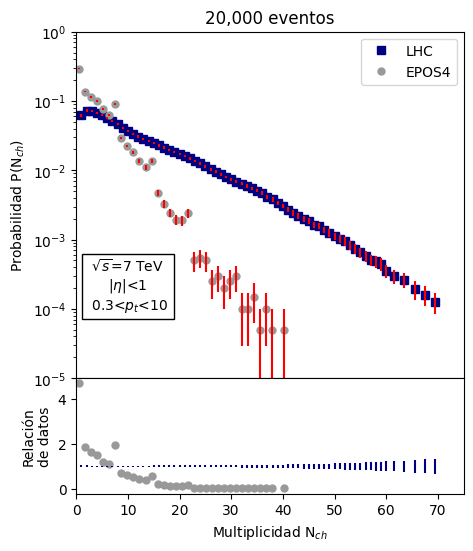

In [69]:
#MULTIPLICIDAD PARTICULAS seleccionadas
df = pd.read_csv('7000GeV/Run5/pp7000_1.txt',sep=' ', header=None, comment='#')
x2 = df[2][0:60]
y2 = df[4][0:60]
error2 = df[6][0:60]


RE1=RE(X2, Y2/100, x2, y2, 0) #error relativo 900GeV

fig, (ax,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(5, 6))
#Datos Cern

ax.plot(X2, Y2/100, 's', color='#000080', label='LHC')


#Datos EPOS4
ax.plot(x2, y2, 'o', color='#999999', markersize = 5, label='EPOS4')
ax.errorbar(X2, Y2/100, yerr=error7000y, linestyle='None', color='r')
ax.errorbar(x2, y2, yerr=error2, linestyle='None', color='r')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-5, 1])
ax.text(10, 10**-4, '$\sqrt{s}$=7 TeV\n|$\eta$|<1 \n 0.3<$p_{t}$<10', bbox=dict(facecolor='white'), ha='center')
ax.legend()
ax.set_yscale('log')
ax.set_title('20,000 eventos')



#Grafica 2
a=[1]*len(X2)
ax2.plot(RE1[1],RE1[0],'o', color='#999999', markersize = 5)
ax2.errorbar(X2, a, yerr=error7000y/(Y2/100), linestyle='None', color='#000080')
ax2.set_ylabel('Relación\nde datos')
ax2.set_xlabel(r'Multiplicidad N$_{ch}$')

plt.savefig('(7000,core:full,no hydro) Multiplicidad 20000 eventos particulas cargadas con error.png')
plt.show()

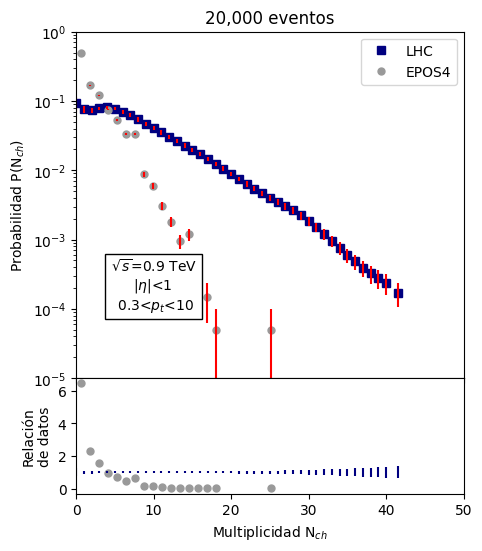

In [70]:
#MULTIPLICIDAD PARTICULAS seleccionadas


df1 = pd.read_csv('900GeV/Run5/pp900_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][0:60]
y1 = df1[4][0:60]
error1 = df1[6][0:60]

RE1=RE(X1, Y1, x1, y1, 0) #error relativo 900GeV

fig, (ax,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(5, 6))
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='LHC')


#Datos EPOS4
ax.plot(x1, y1, 'o', color='#999999', markersize = 5, label='EPOS4')
ax.errorbar(X1, Y1, yerr=error900y, linestyle='None', color='r')
ax.errorbar(x1, y1, yerr=error1, linestyle='None', color='r')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,50])
ax.set_ylim([10**-5, 1])
ax.text(10, 10**-4, '$\sqrt{s}$=0.9 TeV\n|$\eta$|<1 \n 0.3<$p_{t}$<10', bbox=dict(facecolor='white'), ha='center')
ax.legend()
ax.set_yscale('log')
ax.set_title('20,000 eventos')



#Grafica 2
a=[1]*len(X1)
ax2.plot(RE1[1],RE1[0],'o', color='#999999', markersize = 5)
ax2.errorbar(X1, a, yerr=error900y/Y1, linestyle='None', color='#000080')
ax2.set_ylabel('Relación\nde datos')
ax2.set_xlabel(r'Multiplicidad N$_{ch}$')

plt.savefig('(900,core:full,no hydro)Multiplicidad 20000 eventos particulas cargadas con error.png')
plt.show()

## hydro full core PFE

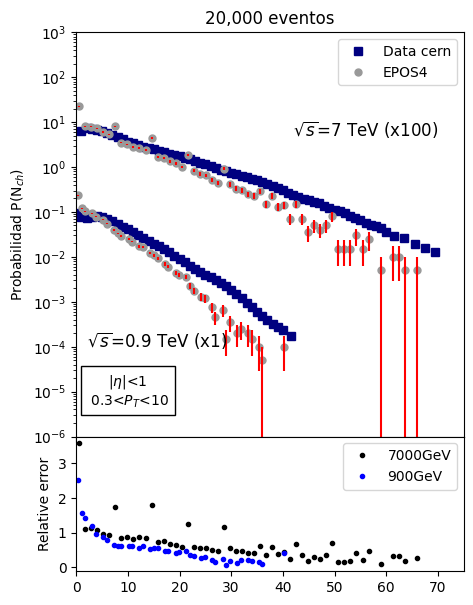

In [71]:
#MULTIPLICIDAD PARTICULAS seleccionadas

df=pd.read_csv('7000GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x=df[2][0:60]
y=df[4][0:60]*100
error=df[6][0:60]*100

df2=pd.read_csv('7000GeV/Run7/pp7000_1.txt',sep=' ', header=None, comment='#')
x2=df2[2][0:60]
y2=df2[4][0:60]*100
error2=df2[6][0:60]*100

x3=(x+x2)/2
y3=(y+y2)/2
error3=np.sqrt(error**2+error2**2)/2

df1 = pd.read_csv('900GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][0:60]
y1 = df1[4][0:60]
error1 = df1[6][0:60]

RE1=RE(X1, Y1, x1, y1, 0) #error relativo 900GeV
RE2=RE(X2, Y2, x3, y3, 0) #error relativo 7000GeV

fig, (ax,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(5, 7))
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='Data cern')
ax.plot(X2, Y2, 's', color='#000080')

#Datos EPOS4
ax.plot(x3, y3, 'o', color='#999999', label='EPOS4', markersize = 5)
ax.plot(x1, y1, 'o', color='#999999', markersize = 5)
ax.errorbar(x3, y3, yerr=error3, fmt='None', color='r')
ax.errorbar(x1, y1, yerr=error1, linestyle='None', color='r')
ax.set_xlabel(r'Multiplicidad N$_{ch}$')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-6, 1000])
ax.text(42,5 , r'$\sqrt{s}$=7 TeV (x100)', fontsize=12)
ax.text(2,1*10**(-4) , r'$\sqrt{s}$=0.9 TeV (x1)', fontsize=12)
ax.text(10, 5*10**-6, '|$\eta$|<1 \n 0.3<$P_T$<10', bbox=dict(facecolor='white'), ha='center')
ax.legend()
ax.set_yscale('log')
ax.set_title('20,000 eventos')



#Grafica 2

ax2.plot(RE2[1],RE2[0], '.k', label='7000GeV')
ax2.plot(RE1[1],RE1[0], '.b', label='900GeV')
ax2.set_ylabel('Relative error')
ax2.legend()

plt.savefig('Multiplicidad 20000 eventos particulas cargadas  (PFE,hydro).png')
plt.show()

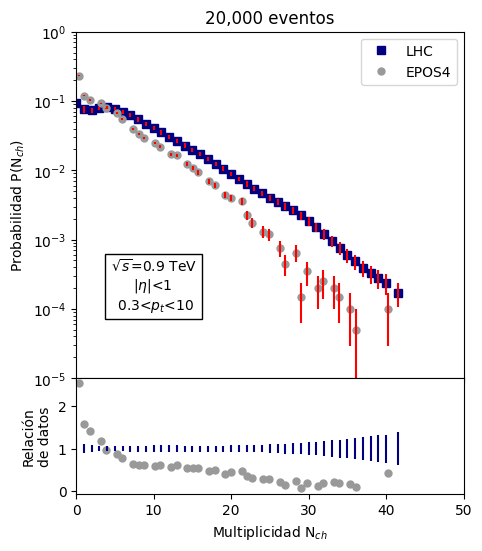

In [72]:
#MULTIPLICIDAD PARTICULAS seleccionadas


df1 = pd.read_csv('900GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][0:60]
y1 = df1[4][0:60]
error1 = df1[6][0:60]

RE1=RE(X1, Y1, x1, y1, 0) #error relativo 900GeV

fig, (ax,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(5, 6))
#Datos Cern

ax.plot(X1, Y1, 's', color='#000080', label='LHC')


#Datos EPOS4
ax.plot(x1, y1, 'o', color='#999999', markersize = 5, label='EPOS4')
ax.errorbar(X1, Y1, yerr=error900y, linestyle='None', color='r')
ax.errorbar(x1, y1, yerr=error1, linestyle='None', color='r')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,50])
ax.set_ylim([10**-5, 1])
ax.text(10, 10**-4, '$\sqrt{s}$=0.9 TeV\n|$\eta$|<1 \n 0.3<$p_{t}$<10', bbox=dict(facecolor='white'), ha='center')
ax.legend()
ax.set_yscale('log')
ax.set_title('20,000 eventos')



#Grafica 2
a=[1]*len(X1)
ax2.plot(RE1[1],RE1[0],'o', color='#999999', markersize = 5)
ax2.errorbar(X1, a, yerr=error900y/Y1, linestyle='None', color='#000080')
ax2.set_ylabel('Relación\nde datos')
ax2.set_xlabel(r'Multiplicidad N$_{ch}$')

plt.savefig('Multiplicidad 20000 eventos particulas cargadas con error (900,PFE,hydro).png')
plt.show()

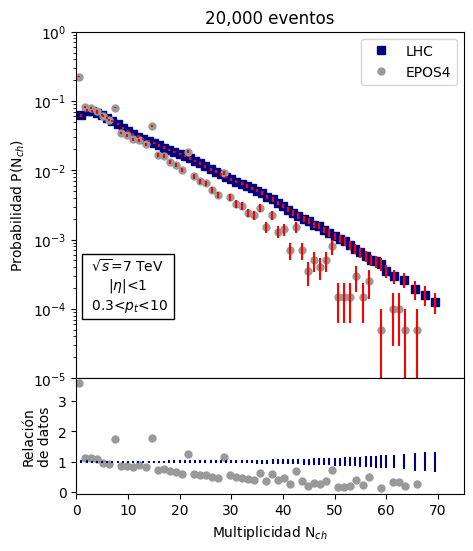

In [73]:
#MULTIPLICIDAD PARTICULAS seleccionadas
df = pd.read_csv('7000GeV/Run7/pp7000_1.txt',sep=' ', header=None, comment='#')
x = df[2][0:60]
y = df[4][0:60]
error = df[6][0:60]

df1 = pd.read_csv('7000GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][0:60]
y1 = df1[4][0:60]
error1 = df1[6][0:60]

x2=(x+x1)/2
y2=(y+y1)/2
error2=np.sqrt(error1**2+error**2)/2

RE1=RE(X2, Y2/100, x2, y2, 0) #error relativo 900GeV

fig, (ax,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(5, 6))
#Datos Cern

ax.plot(X2, Y2/100, 's', color='#000080', label='LHC')


#Datos EPOS4
ax.plot(x2, y2, 'o', color='#999999', markersize = 5, label='EPOS4')
ax.errorbar(X2, Y2/100, yerr=error7000y, linestyle='None', color='r')
ax.errorbar(x2, y2, yerr=error2, linestyle='None', color='r')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,75])
ax.set_ylim([10**-5, 1])
ax.text(10, 10**-4, '$\sqrt{s}$=7 TeV\n|$\eta$|<1 \n 0.3<$p_{t}$<10', bbox=dict(facecolor='white'), ha='center')
ax.legend()
ax.set_yscale('log')
ax.set_title('20,000 eventos')



#Grafica 2
a=[1]*len(X2)
ax2.plot(RE1[1],RE1[0],'o', color='#999999', markersize = 5)
ax2.errorbar(X2, a, yerr=error7000y/(Y2/100), linestyle='None', color='#000080')
ax2.set_ylabel('Relación\nde datos')
ax2.set_xlabel(r'Multiplicidad N$_{ch}$')

plt.savefig('Multiplicidad 20000 eventos particulas cargadas con error (7000,PFE,hydro).png')
plt.show()

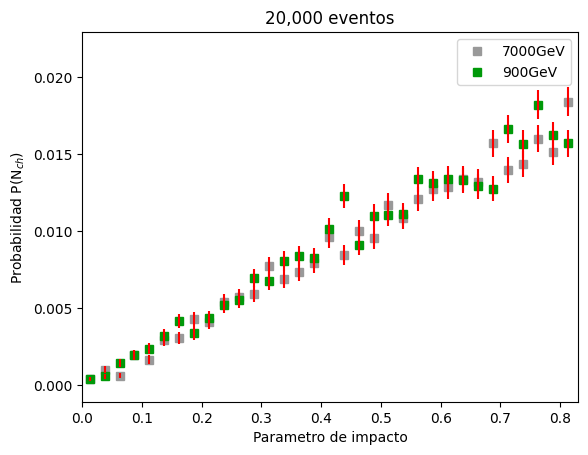

In [74]:

df = pd.read_csv('7000GeV/Run7/pp7000_1.txt',sep=' ', header=None, comment='#')
x = df[2][120:]
y = df[4][120:]
error = df[6][120:]

df1 = pd.read_csv('7000GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][120:]
y1 = df1[4][120:]
error1 = df1[6][120:]

x2=(x+x1)/2
y2=(y+y1)/2
error2=np.sqrt(error1**2+error**2)/2

df3 = pd.read_csv('900GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x3 = df3[2][120:]
y3 = df3[4][120:]
error3 = df3[6][120:]


fig, ax = plt.subplots()

ax.plot(x2, y2, 's', color='#999999', label='7000GeV')
ax.plot(x3, y3, 's', color='#009909', label='900GeV')
ax.errorbar(x2, y2, yerr=error2, linestyle='None', color='r')
ax.errorbar(x3, y3, yerr=error3, linestyle='None', color='r')
ax.set_xlabel(r'Parametro de impacto')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,0.83])
plt.legend()
plt.title('20,000 eventos')
plt.savefig('(PFE,hydro,0.83) Distribucion del parametro de impacto 20000.png')
plt.show()

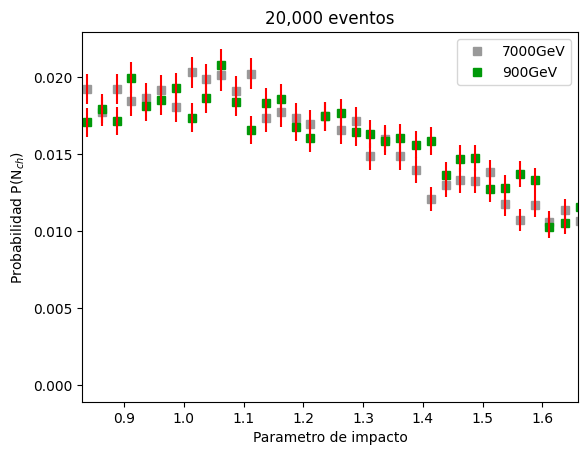

In [75]:

df = pd.read_csv('7000GeV/Run7/pp7000_1.txt',sep=' ', header=None, comment='#')
x = df[2][120:]
y = df[4][120:]
error = df[6][120:]

df1 = pd.read_csv('7000GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][120:]
y1 = df1[4][120:]
error1 = df1[6][120:]

x2=(x+x1)/2
y2=(y+y1)/2
error2=np.sqrt(error1**2+error**2)/2

df3 = pd.read_csv('900GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x3 = df3[2][120:]
y3 = df3[4][120:]
error3 = df3[6][120:]


fig, ax = plt.subplots()

ax.plot(x2, y2, 's', color='#999999', label='7000GeV')
ax.plot(x3, y3, 's', color='#009909', label='900GeV')
ax.errorbar(x2, y2, yerr=error2, linestyle='None', color='r')
ax.errorbar(x3, y3, yerr=error3, linestyle='None', color='r')
ax.set_xlabel(r'Parametro de impacto')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0.83,1.66])
plt.legend()
plt.title('20,000 eventos')
plt.savefig('(PFE,hydro,1.66) Distribucion del parametro de impacto 20000.png')
plt.show()

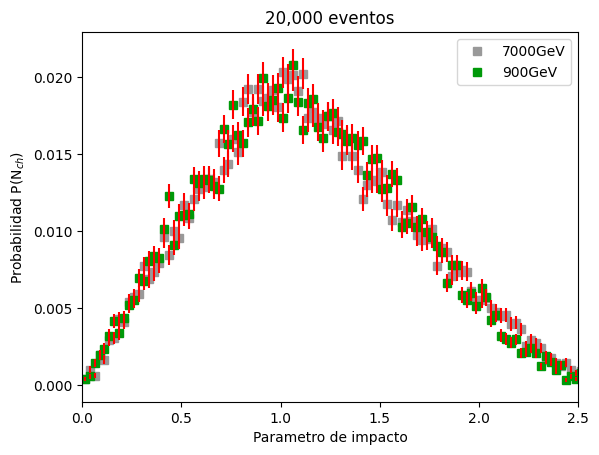

In [76]:
df = pd.read_csv('7000GeV/Run7/pp7000_1.txt',sep=' ', header=None, comment='#')
x = df[2][120:]
y = df[4][120:]
error = df[6][120:]

df1 = pd.read_csv('7000GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x1 = df1[2][120:]
y1 = df1[4][120:]
error1 = df1[6][120:]

x2=(x+x1)/2
y2=(y+y1)/2
error2=np.sqrt(error1**2+error**2)/2

df3 = pd.read_csv('900GeV/Run6/pp7000_1.txt',sep=' ', header=None, comment='#')
x3 = df3[2][120:]
y3 = df3[4][120:]
error3 = df3[6][120:]


fig, ax = plt.subplots()

ax.plot(x2, y2, 's', color='#999999', label='7000GeV')
ax.plot(x3, y3, 's', color='#009909', label='900GeV')
ax.errorbar(x2, y2, yerr=error2, linestyle='None', color='r')
ax.errorbar(x3, y3, yerr=error3, linestyle='None', color='r')
ax.set_xlabel(r'Parametro de impacto')
ax.set_ylabel(r'Probabilidad P(N$_{ch}$)')
ax.set_xlim([0,2.5])
plt.legend()
plt.title('20,000 eventos')
plt.savefig('(PFE,hydro,2.5) Distribucion del parametro de impacto 20000.png')
plt.show()